<h1 align="center"><strong>Streaming Viewing Analysis</strong></h1>

<h2><strong>1. Read the Data In</strong></h2>

This is where I import any needed Python libraries and all datasets I'll use in this notebook.

In [206]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

*<h3><strong>Note about the datasets:</strong></h3>*
*Since I used four different datasets, I decided to clean each dataset in their own Jupyter Notebook and store each dataframe as a variable to use in this notebook.*

*<strong>Individual Dataset Notebooks</strong>*</br>
> [Hulu](hulu.ipynb)</br>
> [Imdb](imdb.ipynb)</br>
> [Netflix](netflix.ipynb)</br>
> [Prime Video](prime_video.ipynb)

In [207]:
# Add stored dataframes from other notebooks
%store -r hulu_cleaned
%store -r netflix_cleaned
%store -r prime_video_cleaned
%store -r imdb_cleaned

In [208]:
# Setup theme
PALETTE = 'magma'
sns.set_theme(style="white")

plt.rcParams["font.family"] = "monospace"

<h2><strong>2. Manipulate and Clean the Data</strong></h2>

In [209]:
# Combine Hulu, Netflix, and Prime_Video dataframes
streaming_list = [hulu_cleaned, netflix_cleaned, prime_video_cleaned]
streaming_combined = pd.concat(streaming_list)

# View the first five rows of the new combined dataframe
streaming_combined.head()

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu


In [210]:
# Remove the timestamp from "Date Watched" column
streaming_combined['Date Watched'] = pd.to_datetime(streaming_combined['Date Watched']).dt.normalize()

streaming_combined.head()

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,2022-10-30,Hulu
1,Only Murders in the Building,2022-10-30,Hulu
2,Only Murders in the Building,2022-10-30,Hulu
3,Only Murders in the Building,2022-10-30,Hulu
4,Only Murders in the Building,2022-10-30,Hulu


In [211]:
most_watched_days = streaming_combined["Date Watched"].value_counts()

most_watched_days.head(10)

2020-11-13    79
2020-11-20    60
2020-11-19    59
2020-11-12    58
2020-11-22    57
2018-05-28    52
2012-09-09    49
2020-08-24    44
2020-12-24    44
2019-08-03    43
Name: Date Watched, dtype: int64

In [212]:
# View most streamed titles in combined dataframe
most_streamed_titles = streaming_combined.Title.value_counts()

most_streamed_titles.head(10)

Them Idiots! Whirled Tour                                                     66
Home Improvement                                                              52
NullCompleteVideo                                                             44
Larry the Cable Guy: Tailgate Party                                           34
Top Gear: Series 22: Episode 5                                                32
Rodney Carrington: Laughter’s Good                                            30
Jeff Dunham: Relative Disaster                                                30
White Collar: Season 1: Pilot (Episode 1)                                     30
Sherlock: Series 1: A Study in Pink (Episode 1)                               30
Yu-Gi-Oh!: Season 1: Best of Friends Best of Duelists: Part 1 (Episode 33)    25
Name: Title, dtype: int64

In [213]:
# Merge streaming_combined dataframe with imdb_cleaned dataframe
data_combined = pd.merge(streaming_combined, imdb_cleaned, how="inner", on="Title")

# View the first five rows of the new merged dataframe
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score
0,Dark Shadows,2022-10-19,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2
1,Dark Shadows,2012-10-27,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
2,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
3,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
4,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2


In [214]:
# Get info about the merged dataframe
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              520 non-null    object        
 1   Date Watched       547 non-null    datetime64[ns]
 2   Streaming Service  554 non-null    object        
 3   Release Year       554 non-null    int64         
 4   Runtime            554 non-null    int64         
 5   Genres             554 non-null    object        
 6   Imdb Score         501 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 34.6+ KB


In [215]:
# Convert "Date Watched" column from string to datetime 
data_combined["Date Watched"] = data_combined["Date Watched"].apply(pd.to_datetime)

# Check to make sure "Date Watched" is now datetime
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              520 non-null    object        
 1   Date Watched       547 non-null    datetime64[ns]
 2   Streaming Service  554 non-null    object        
 3   Release Year       554 non-null    int64         
 4   Runtime            554 non-null    int64         
 5   Genres             554 non-null    object        
 6   Imdb Score         501 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 34.6+ KB


In [216]:
# Add a new column "Month Watched" that gets the month the show or movie was watched from the "Date Watched" column
data_combined["Month Watched"] = data_combined["Date Watched"].dt.month_name()

# View merged dataframe to make sure new column was correctly added
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched
0,Dark Shadows,2022-10-19,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
1,Dark Shadows,2012-10-27,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
2,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
3,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
4,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November


In [217]:
# efficient way to extract year from string format date
data_combined['Year Watched'] = pd.DatetimeIndex(data_combined['Date Watched']).year

data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


In [218]:
top_streaming_service = data_combined["Streaming Service"].value_counts()

top_streaming_service

Netflix        490
Prime Video     44
Hulu            20
Name: Streaming Service, dtype: int64

In [219]:
top_genres = data_combined.Genres.value_counts()

top_genres.head()

['comedy']                     90
['documentation']              37
['romance', 'comedy']          35
['comedy', 'documentation']    35
[]                             34
Name: Genres, dtype: int64

In [244]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

data_combined.Genres = data_combined.Genres.map(get_genres)
genres

{'comedy': 326,
 'fantasy': 76,
 'horror': 11,
 '': 33,
 'drama': 182,
 'romance': 147,
 'scifi': 28,
 'action': 38,
 'family': 80,
 'animation': 53,
 'music': 34,
 'reality': 0,
 'history': 6,
 'european': 6,
 'crime': 56,
 'documentation': 127,
 'thriller': 39,
 'sport': 22,
 'western': 2}

In [221]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [246]:
# Create the new "Genre" column 
data_combined["Genre"] = data_combined.Genres.map(transform_genres)
data_combined.Genre.value_counts()

comedy           204
drama             71
documentation     70
romance           63
none              34
animation         28
crime             25
scifi             13
family             9
music              9
fantasy            8
action             7
thriller           6
western            3
horror             3
history            1
Name: Genre, dtype: int64

In [223]:
# Change "documentation" to "doc" abbreviation
data_combined.Genre.replace(to_replace="documentation", value="doc", inplace=True)

<AxesSubplot:xlabel='Genres', ylabel='Count'>

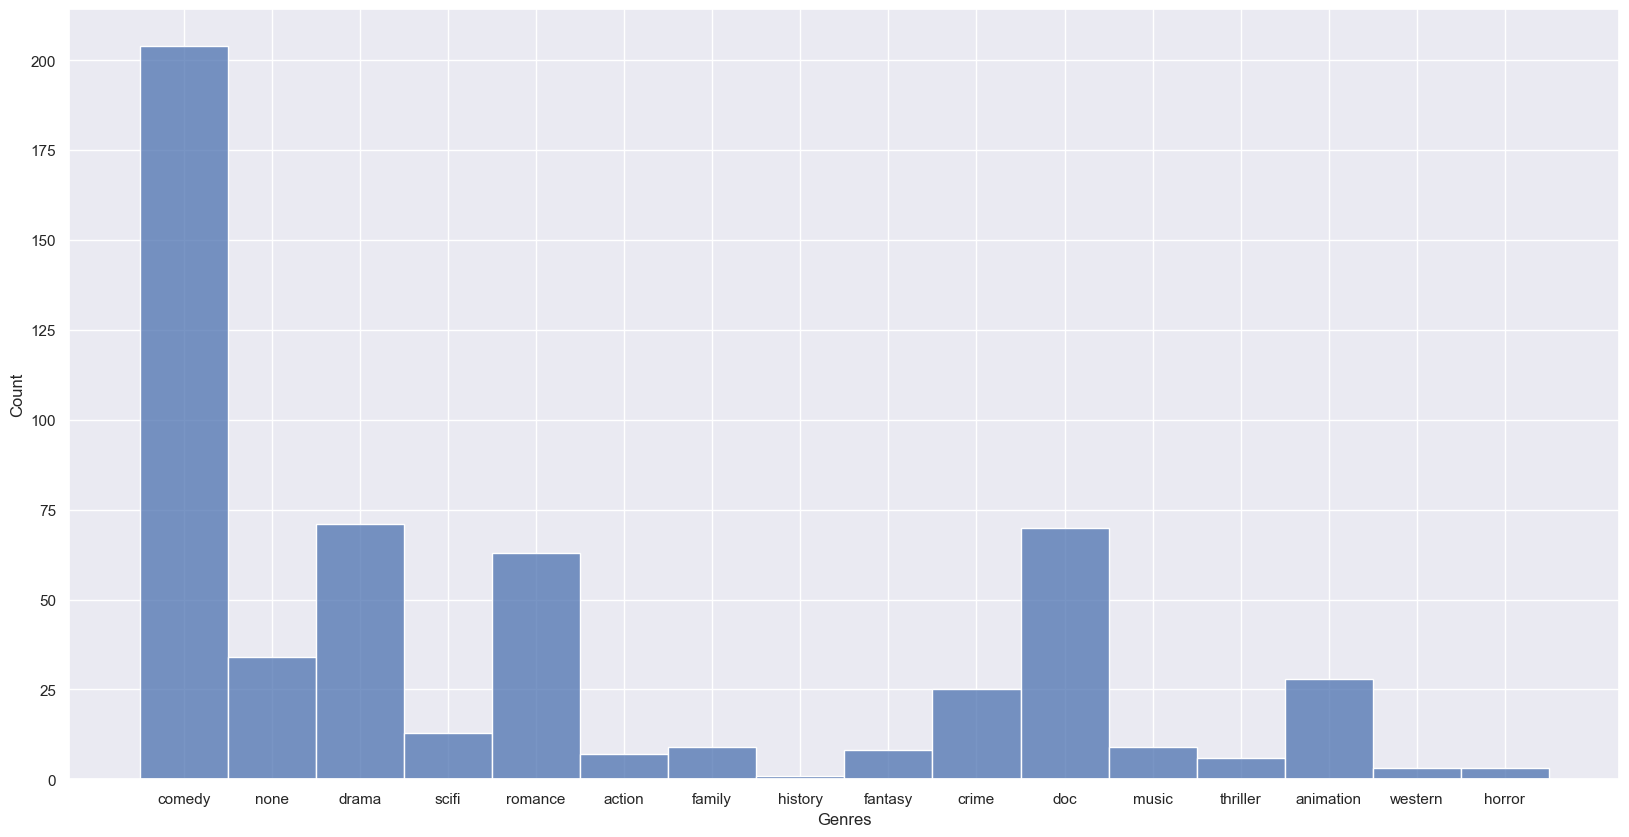

In [224]:
# Create histogram showing Genre by count
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.histplot(data_combined.Genre)

In [225]:
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


<h3><strong>Question:</strong></h3>
What are the top five most watched titles in the combined dataset?

Which is the top most watched title?

In [226]:
top_titles = data_combined.Title.value_counts().head()

top_titles

Jeff Dunham: Relative Disaster             30
Katt Williams: Great America               23
Pinkfong & Baby Shark's Space Adventure    13
Grey's Anatomy                             11
Someone Great                              10
Name: Title, dtype: int64

In [227]:
# convert series back to dataframe for visualisation 
titles_counts = pd.DataFrame({'Title': top_titles.index, 'counts': top_titles.values})

titles_counts

,Title,counts
0,Jeff Dunham: Relative Disaster,30
1,Katt Williams: Great America,23
2,Pinkfong & Baby Shark's Space Adventure,13
3,Grey's Anatomy,11
4,Someone Great,10


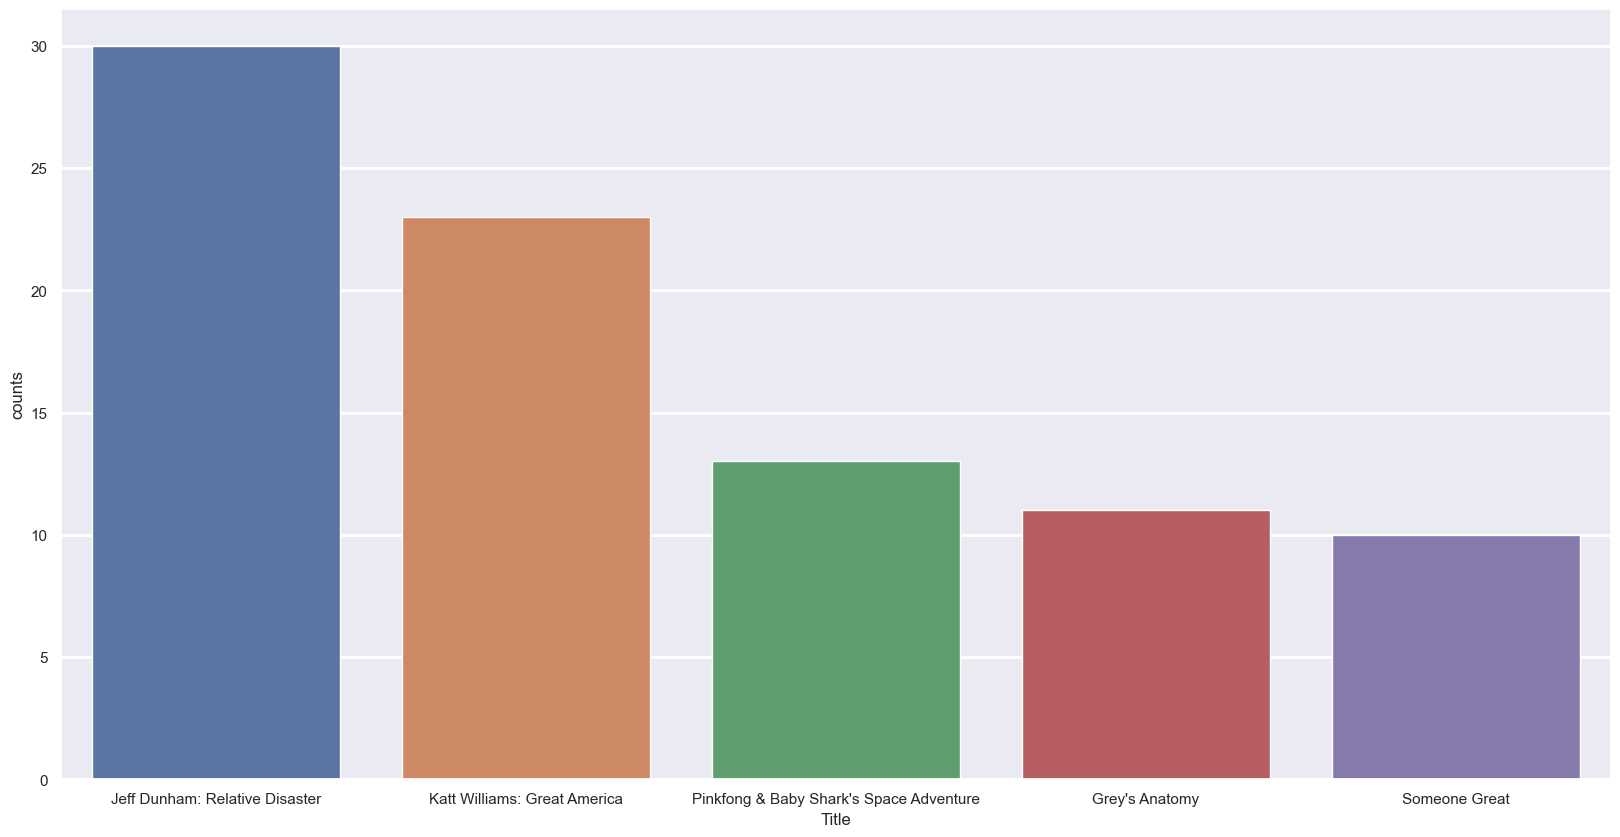

In [228]:
# Create a Seaborn Barplot showing top 5 titles watched
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

sns.barplot(x = "Title", y="counts", data = titles_counts)

plt.show()

<h3><strong>Answers:</strong></h3>
Top 5 streamed titles
<ul>
    <li>Jeff Dunham: Relative Disaster</li>
    <li>Katt Williams: Great America</li>
    <li>Pinkfong & Baby Shark's Space Adventure</li>
    <li>Grey's Anatomy</li>
    <li>Someone Great</li>
</ul>

The top streamed title is *Jeff Dunham: Relative Disaster*

In [229]:
# Group the "Release Year" by decade
def get_decade(val):
    return int(str(val)[0:-1] + "0")

data_combined["Decade"] = data_combined["Release Year"].map(get_decade)
data_combined["Decade"].value_counts()

2010    310
2020    193
2000     32
1990     18
1950      1
Name: Decade, dtype: int64

In [230]:

data_combined["Date Watched"] = pd.to_datetime(data_combined["Date Watched"], utc=True)

In [231]:
data_combined = data_combined.set_index("Date Watched")

In [232]:
data_combined.index = data_combined.index.tz_convert('America/New_York')

In [233]:
data_combined = data_combined.reset_index()

In [234]:
data_combined["Day Watched"] = data_combined["Date Watched"].dt.weekday
data_combined["Hour Watched"] = data_combined["Date Watched"].dt.hour

In [235]:
data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Decade,Day Watched,Hour Watched
0,2022-10-18 20:00:00-04:00,Dark Shadows,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,2010,1.0,20.0
1,2012-10-26 20:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,2010,4.0,20.0
2,2012-11-03 20:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,2010,5.0,20.0
3,2012-11-03 20:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,2010,5.0,20.0
4,2012-11-03 20:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,2010,5.0,20.0


In [236]:
# set days Monday-Sunday
data_combined['Day Watched'] = pd.Categorical(data_combined['Day Watched'], categories=[0,1,2,3,4,5,6], ordered=True)

In [237]:
# create data per day and sort by day using sort_index function
watched_per_day = data_combined['Day Watched'].value_counts().sort_index()

watched_per_day

0     78
1     51
2     56
3     52
4    135
5    101
6     74
Name: Day Watched, dtype: int64

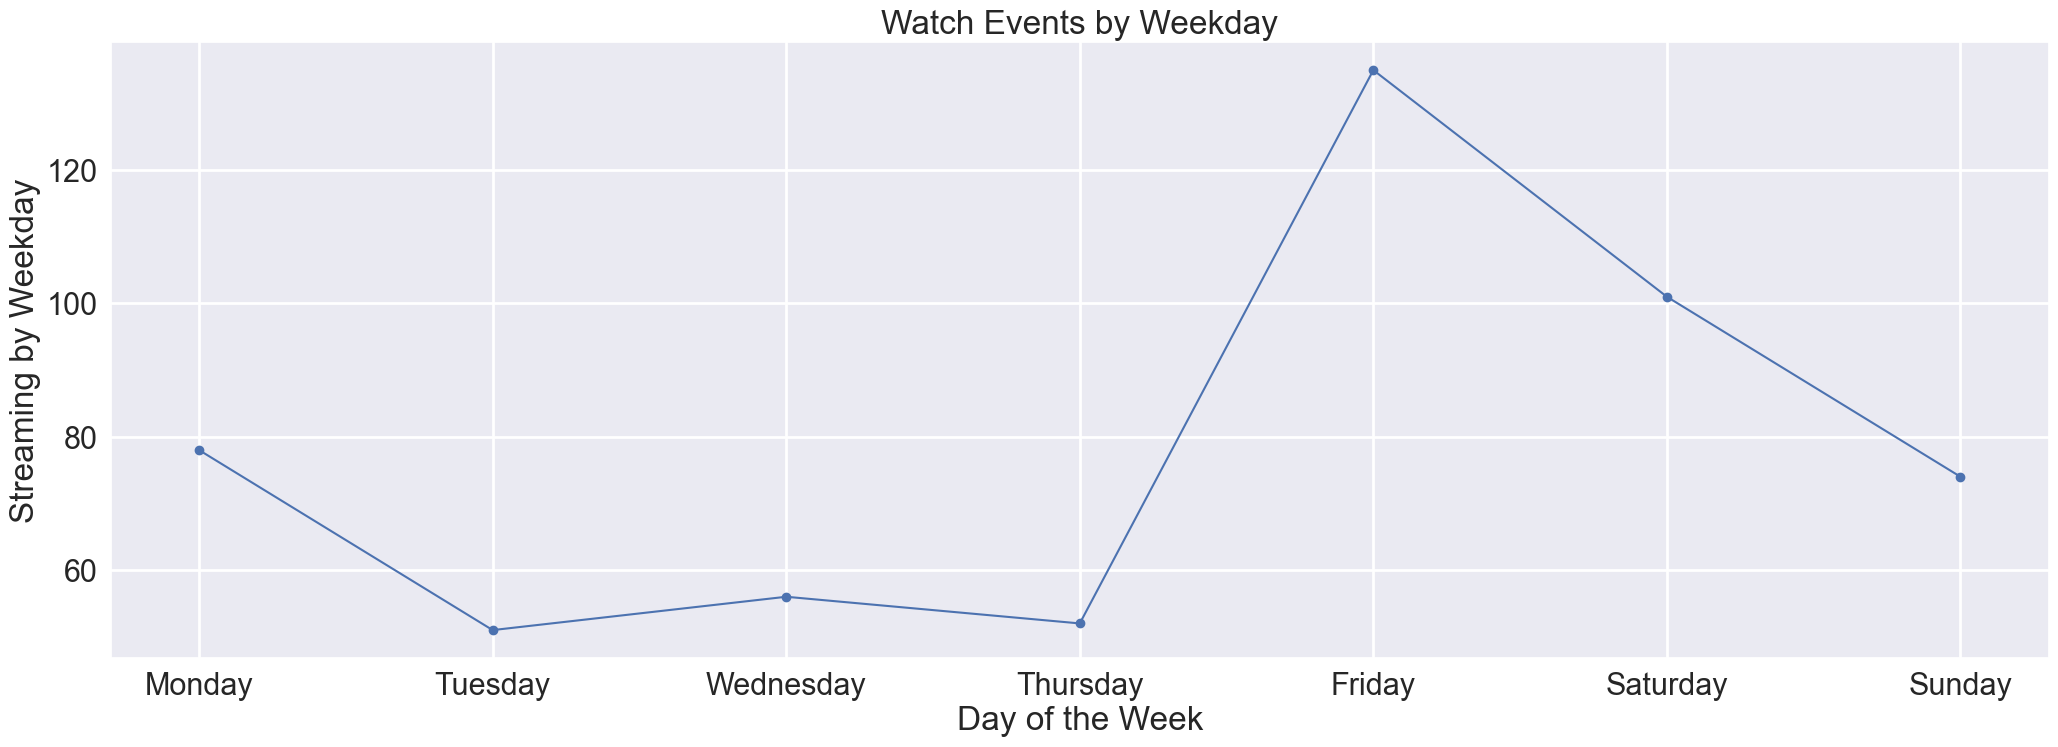

<Figure size 640x480 with 0 Axes>

In [238]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

plt.plot(watched_per_day, marker="o")

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Streaming by Weekday')
plt.xlabel('Day of the Week')
plt.xticks(ticks = range(7), labels=days_of_the_week)
plt.title('Watch Events by Weekday')

plt.show()
plt.clf()

In [239]:
# Set hours
data_combined['Hour Watched'] = pd.Categorical(data_combined['Hour Watched'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [240]:
# create data per hour and sort by hour using sort_index function
watched_per_hour = data_combined['Hour Watched'].value_counts().sort_index()

watched_per_hour

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19    168
20    379
21      0
22      0
23      0
Name: Hour Watched, dtype: int64

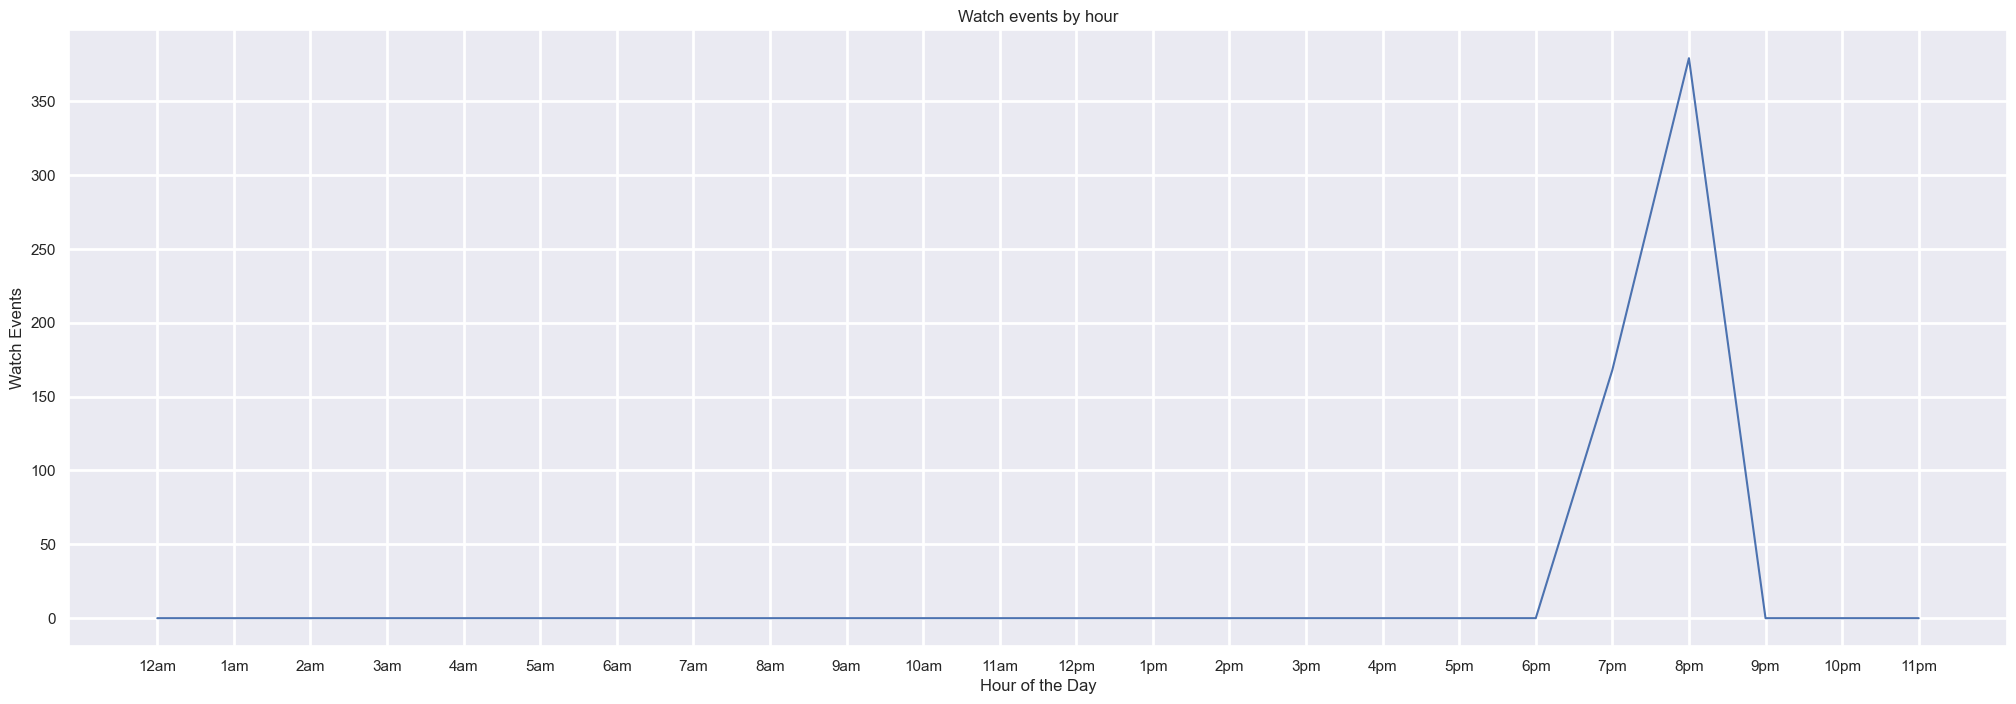

<Figure size 640x480 with 0 Axes>

In [241]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

plt.plot(watched_per_hour)

hours_per_day = ["12am", "1am", "2am","3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
plt.ylabel('Watch Events')
plt.xlabel('Hour of the Day')
plt.xticks(ticks = range(24), labels=hours_per_day)
plt.title('Watch events by hour')

plt.show()
plt.clf()

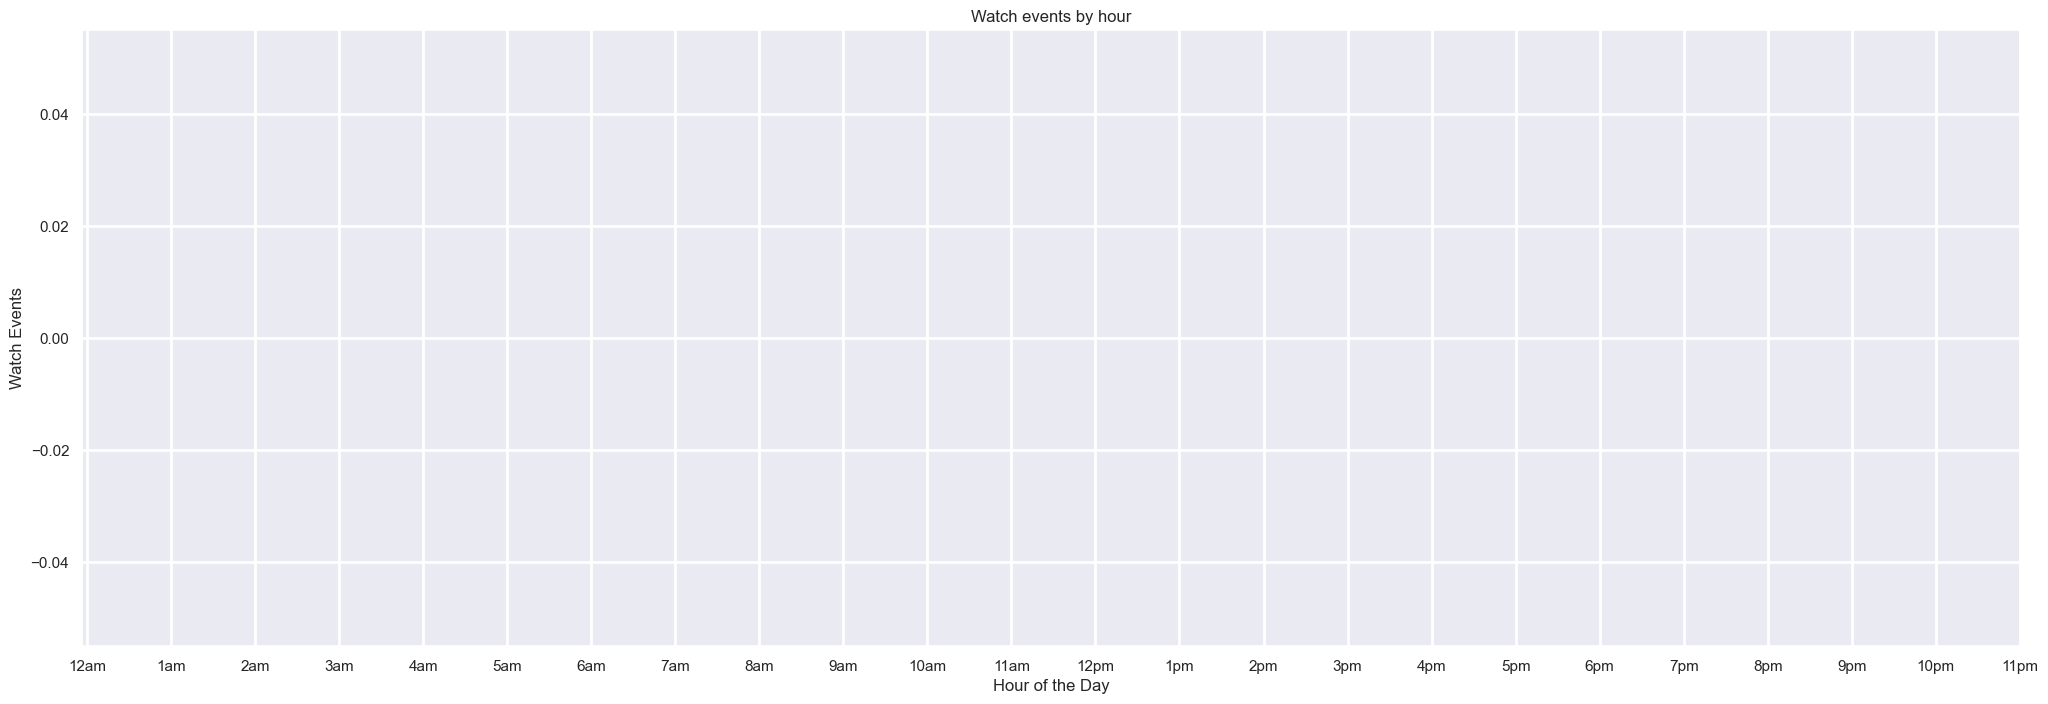

<Figure size 640x480 with 0 Axes>

In [242]:
sns.set_style('darkgrid')
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

sns.scatterplot(x = watched_per_hour)

hours_per_day = ["12am", "1am", "2am","3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
plt.ylabel('Watch Events')
plt.xlabel('Hour of the Day')
plt.xticks(ticks = range(24), labels=hours_per_day)
plt.title('Watch events by hour')

plt.show()
plt.clf()